author: aho jchung

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.image as image

In [2]:
## 1. Create a matrix of random values of a distribution of your choice.
 
arr_rand = np.random.random((12, 9))

In [3]:
## 2. Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.
 
x = 6
b = [i for i in range(x, x + 12)]
b = np.reshape(b, (4,3))

In [4]:
## 3. Write a function that creates an incremental N-dimensional (nd) array of dimension
## (1,n) with values between 0 and 1. Use arr.shape to verify
 
def ndarr(n):
    return(np.atleast_2d(np.linspace(0, 1, n)))

In [5]:
## 4. Generate a 10x12 array and extract row 0-4 of columns 8-12.
 
arr_q4 = np.random.random((10,12))
arr_sub_q4 = arr_q4[:4, 8:12]

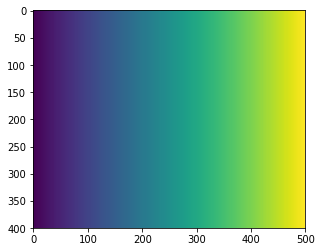

In [6]:
## 5. Using the function in Q3, get m vectors and bind them together (to have a m x n)
## matrix. Plot the matrix with matplotlib’s imshow
 
def make_grad(m,n):
    return (np.vstack(ndarr(n) for _ in range(m)))

m = 400
n = 500
arr_q5 = make_grad(m,n)
plot.imshow(arr_q5)

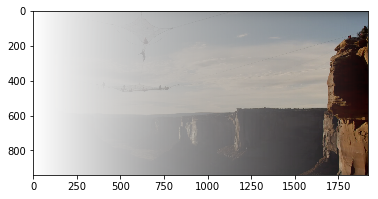

In [7]:
## 6. Multiply the resulting matrix from Q5 with the matrix of a picture of your choice. Plot the resulting matrix.
 
#img = image.imread("RyanGosling.png")
img = image.imread("https://cdn.mrctv.org/sites/default/files/uploads/cray.png")
x,y,ch = img.shape[0],img.shape[1],img.shape[2]
gradient = make_grad(x,y)
for i in range(ch):
    img[:,:,i] *= gradient  
plot.imshow(img)

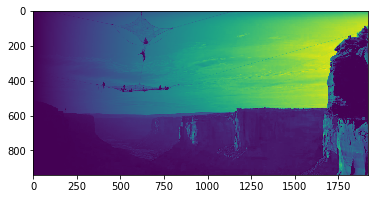

In [8]:
def split(arr):
    return(arr[:,:,0], arr[:,:,1], arr[:,:,2])

def merge(r, g, b):
    return(np.stack([r, g, b], axis = 2))

r,g,b = split(img)

plot.imshow(b)

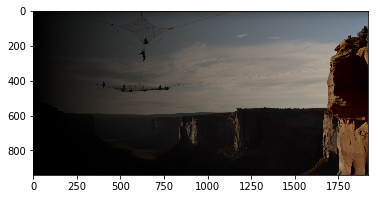

In [9]:
result = merge(r,g,b)
plot.imshow(result)

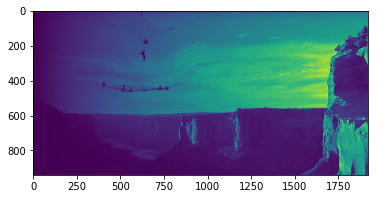

In [10]:
def channel_adjust(channel, values):
    # flatten
    orig_size = channel.shape
    flat_channel = channel.flatten()
    adjusted = np.interp(
        flat_channel,
        np.linspace(0, 1, len(values)),
        values)

    # put back into image form
    return adjusted.reshape(orig_size)

v = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.865, 0.875, 1]
w = [0, 0.05, 0.1, 0.5, 0.9, 0.95, 1.0]
u = [0, 0.3, 0.5, 0.7, 1.0]

adjusted = channel_adjust(r,v)
plot.imshow(adjusted)

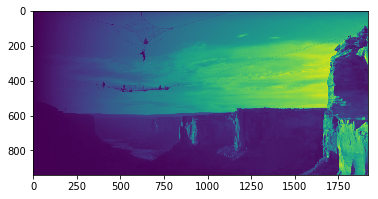

In [11]:
plot.imshow(r)

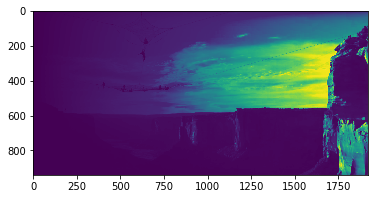

In [12]:
adjusted2 = channel_adjust(r,w)
plot.imshow(adjusted2)

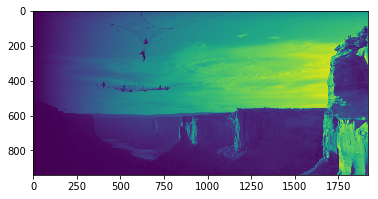

In [13]:
adjusted3 = channel_adjust(r,u)
plot.imshow(adjusted3)

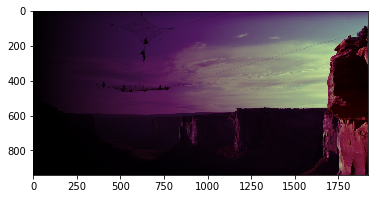

In [14]:
rprime = channel_adjust(r,v)
gprime = channel_adjust(g,w)
bprime = channel_adjust(b,u)
arr = merge(rprime,gprime,bprime)
plot.imshow(arr)

In [16]:
def vignette(m,n):
    #mask = np.ndarray(np.ones((int(round(m * 1.2)),int(round(n * 1.2)))))
    a = m * 3
    b = n * 3
    mask = np.ones((a, b))
    print("Shape")
    print(mask.shape)
    print(img.shape)
    print("Hello")
    #mask = np.ndarray(shape=(m,n))
    ## f = lambda x,y: mask[y, x] * np.sin(np.pi * (x / n)) * np.sin(np.pi * (y / m))
    ## print(f)
    
    ## mask = [[f for x in range(n)] for y in range(m)]
    ## mask = map(f, mask)
    mask = [[mask[y][x] * np.sin(np.pi * (x/b)) * np.sin(np.pi * (y/a)) for x in range(b)] for y in range(a)]
    plot.imshow(mask)
    #print(mask.shape)
    return (mask)
    ## return ([[mask[y][x] * (np.sin(np.pi * (x/n))) * (np.sin(np.pi * (y/m))) for x in range(n)] for y in range(m)])
    
#img = image.imread("RyanGosling.png")
img = image.imread("https://cdn.mrctv.org/sites/default/files/uploads/cray.png")
x,y,ch = img.shape[0],img.shape[1],img.shape[2]
test = np.asarray(vignette(x,y))
#print(test.shape, img.shape)



Shape
(2820, 5760)
(940, 1920, 4)
Hello


MemoryError: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f977076c730> (for post_execute):


MemoryError: 

MemoryError: 

In [ ]:
midx = int(round(1.5 * x))
midy = int(round(1.5 * y))

subslice = test[midx:-midx,midy:-midy]
print("Shapes")
print(test.shape)
print(subslice.shape)
print(img.shape)
print("Meow")

#plot.imshow(subslice)

#plot.imshow(test)
for i in range(ch):
    img[:,:,i] *= subslice  
plot.imshow(img)

In [ ]:
def circular_mask(m,n):
    a = m + 500
    b = n + 500
    mask = np.ones((a, b))
    for y in range(a):
        for x in range(b):
            mask[y][x] *= np.sin(np.pi * (x/b)) * np.sin(np.pi * (y/a))
    plot.imshow(mask)
    return (mask)

print(x,y)
test = circular_mask(x,y)
